# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')

## Loading Data

In [3]:
df = pd.read_csv('./datasets/employee.csv')
df

,no,nama,tanggal_lahir,jenis_kelamin,gaji
0,1,ani,3/2/1993,perempuan,1000000
1,2,budi,3/1/1992,laki-laki,2000000
2,3,susi,4/5/2000,perempuan,1350000
3,4,wati,5/20/1995,perempuan,10000000
4,5,ati,4/23/1994,perempuan,3400000
5,6,ina,5/6/1991,perempuan,5000000
6,7,nia,4/5/1990,perempuan,2500000
7,8,dodi,4/3/1998,laki-laki,3400000
8,9,dedi,6/20/1993,laki-laki,8900000
9,10,roni,9/20/2001,laki-laki,2100000


In [4]:
df.shape

(10, 5)

# Explore Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   no             10 non-null     int64 
 1   nama           10 non-null     object
 2   tanggal_lahir  10 non-null     object
 3   jenis_kelamin  10 non-null     object
 4   gaji           10 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


## Preprocessing

### Handling Data

In [6]:
df['tanggal_lahir'] = pd.to_datetime(df['tanggal_lahir'])
df.head()

,no,nama,tanggal_lahir,jenis_kelamin,gaji
0,1,ani,1993-03-02,perempuan,1000000
1,2,budi,1992-03-01,laki-laki,2000000
2,3,susi,2000-04-05,perempuan,1350000
3,4,wati,1995-05-20,perempuan,10000000
4,5,ati,1994-04-23,perempuan,3400000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   no             10 non-null     int64         
 1   nama           10 non-null     object        
 2   tanggal_lahir  10 non-null     datetime64[ns]
 3   jenis_kelamin  10 non-null     object        
 4   gaji           10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 528.0+ bytes


### Transformation

In [8]:
jk_dum = pd.get_dummies(df['jenis_kelamin'], prefix= "jk")
jk_dum.head()

,jk_laki-laki,jk_perempuan
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [11]:
df_jk = pd.concat([df, jk_dum], axis = 1)
df_jk.head()

,no,nama,tanggal_lahir,jenis_kelamin,gaji,jk_laki-laki,jk_perempuan
0,1,ani,1993-03-02,perempuan,1000000,0,1
1,2,budi,1992-03-01,laki-laki,2000000,1,0
2,3,susi,2000-04-05,perempuan,1350000,0,1
3,4,wati,1995-05-20,perempuan,10000000,0,1
4,5,ati,1994-04-23,perempuan,3400000,0,1


In [12]:
del df_jk['jenis_kelamin']

In [13]:
df_jk.head()

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan
0,1,ani,1993-03-02,1000000,0,1
1,2,budi,1992-03-01,2000000,1,0
2,3,susi,2000-04-05,1350000,0,1
3,4,wati,1995-05-20,10000000,0,1
4,5,ati,1994-04-23,3400000,0,1


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
df['jk_label'] = le.fit_transform(df["jenis_kelamin"])

In [19]:
df

,no,nama,tanggal_lahir,jenis_kelamin,gaji,jk_label
0,1,ani,1993-03-02,perempuan,1000000,1
1,2,budi,1992-03-01,laki-laki,2000000,0
2,3,susi,2000-04-05,perempuan,1350000,1
3,4,wati,1995-05-20,perempuan,10000000,1
4,5,ati,1994-04-23,perempuan,3400000,1
5,6,ina,1991-05-06,perempuan,5000000,1
6,7,nia,1990-04-05,perempuan,2500000,1
7,8,dodi,1998-04-03,laki-laki,3400000,0
8,9,dedi,1993-06-20,laki-laki,8900000,0
9,10,roni,2001-09-20,laki-laki,2100000,0


### Normalisasi

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()

In [23]:
df_jk['sc_gaji'] = sc.fit_transform(df_jk[['gaji']]) 

In [24]:
df_jk

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,sc_gaji
0,1,ani,1993-03-02,1000000,0,1,-1.001779
1,2,budi,1992-03-01,2000000,1,0,-0.663911
2,3,susi,2000-04-05,1350000,0,1,-0.883525
3,4,wati,1995-05-20,10000000,0,1,2.039035
4,5,ati,1994-04-23,3400000,0,1,-0.190896
5,6,ina,1991-05-06,5000000,0,1,0.349694
6,7,nia,1990-04-05,2500000,0,1,-0.494977
7,8,dodi,1998-04-03,3400000,1,0,-0.190896
8,9,dedi,1993-06-20,8900000,1,0,1.667380
9,10,roni,2001-09-20,2100000,1,0,-0.630124


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
mm = MinMaxScaler()

In [27]:
df_jk['mm_gaji'] = mm.fit_transform(df_jk[['gaji']])

In [28]:
df_jk

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,sc_gaji,mm_gaji
0,1,ani,1993-03-02,1000000,0,1,-1.001779,0.000000
1,2,budi,1992-03-01,2000000,1,0,-0.663911,0.111111
2,3,susi,2000-04-05,1350000,0,1,-0.883525,0.038889
3,4,wati,1995-05-20,10000000,0,1,2.039035,1.000000
4,5,ati,1994-04-23,3400000,0,1,-0.190896,0.266667
5,6,ina,1991-05-06,5000000,0,1,0.349694,0.444444
6,7,nia,1990-04-05,2500000,0,1,-0.494977,0.166667
7,8,dodi,1998-04-03,3400000,1,0,-0.190896,0.266667
8,9,dedi,1993-06-20,8900000,1,0,1.667380,0.877778
9,10,roni,2001-09-20,2100000,1,0,-0.630124,0.122222


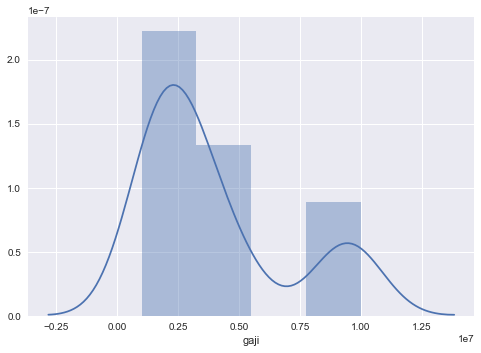

In [29]:
sns.distplot(df_jk['gaji'])
plt.show()

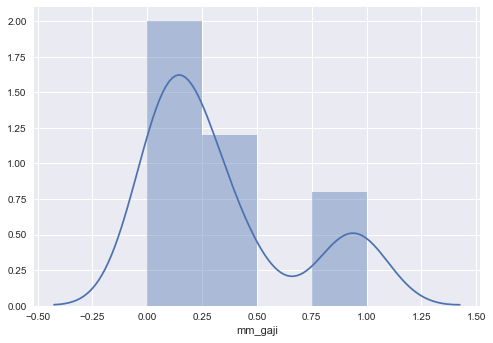

In [30]:
sns.distplot(df_jk['mm_gaji'])
plt.show()

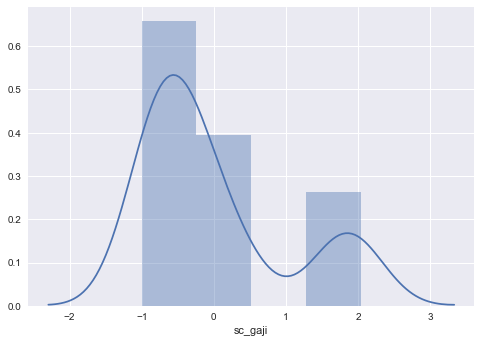

In [31]:
sns.distplot(df_jk['sc_gaji'])
plt.show()

## Outlier

In [32]:
boston = pd.read_csv('boston_housing.csv')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


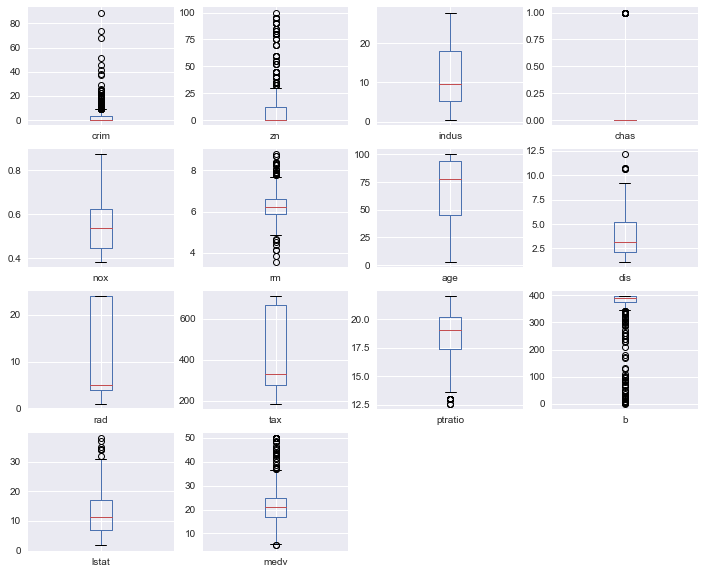

In [34]:
boston.plot(kind = "box", subplots =True, layout = (4,4), sharex = False, sharey = False, figsize=(12,10))
plt.show()

In [35]:
boston_df_o1 = boston
Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

crim         3.595037
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.175000
rm           0.738000
age         49.050000
dis          3.088250
rad         20.000000
tax        387.000000
ptratio      2.800000
b           20.847500
lstat       10.005000
medv         7.975000
dtype: float64


In [36]:
boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [38]:
boston_df_out.shape

(268, 14)

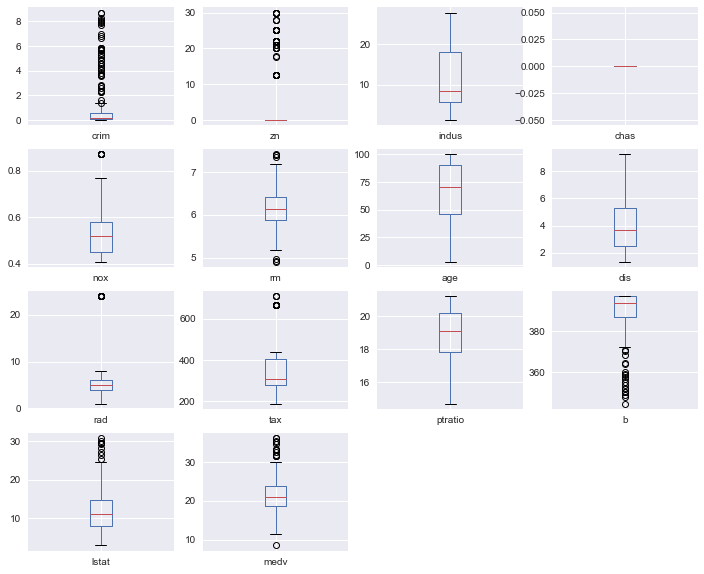

In [39]:
boston_df_out.plot(kind = "box", subplots =True, layout = (4,4), sharex = False, sharey = False, figsize=(12,10))
plt.show()

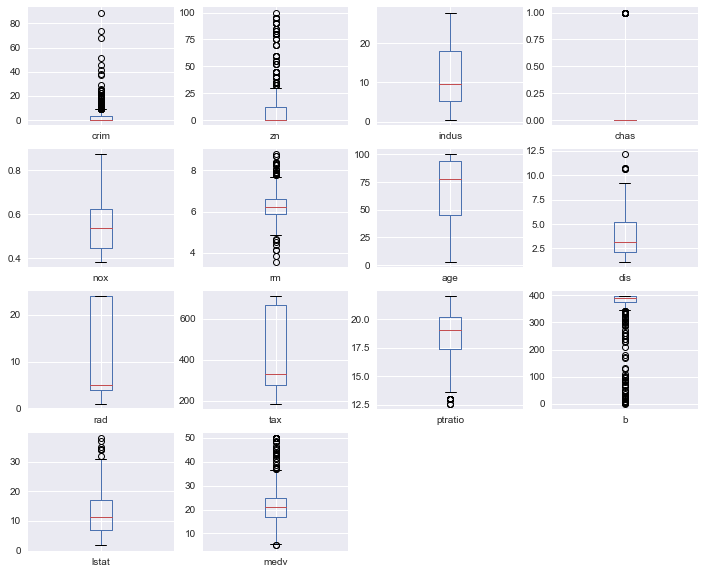

In [40]:
boston.plot(kind = "box", subplots =True, layout = (4,4), sharex = False, sharey = False, figsize=(12,10))
plt.show()

## Feature Selection

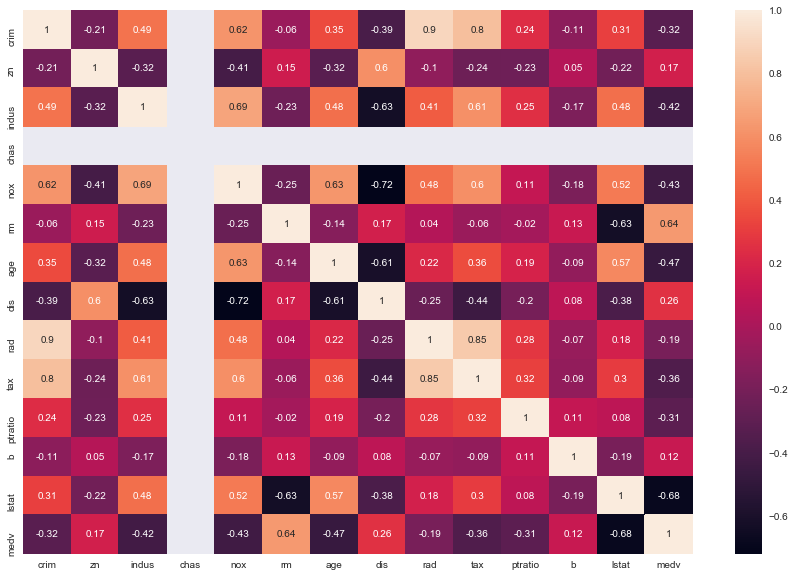

In [41]:
fig = plt.subplots(figsize=(15,10))
correlation_matrix = boston_df_out.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)